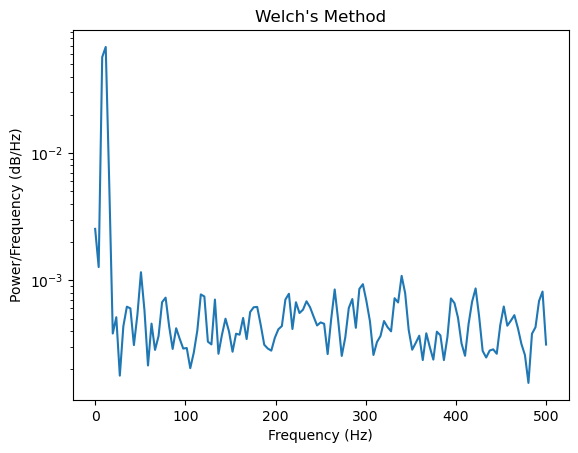

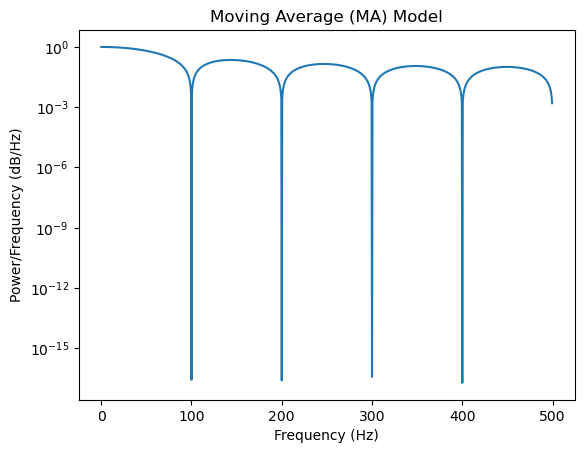

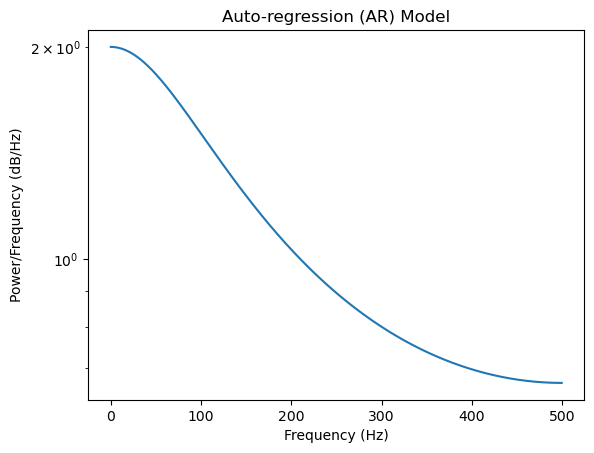

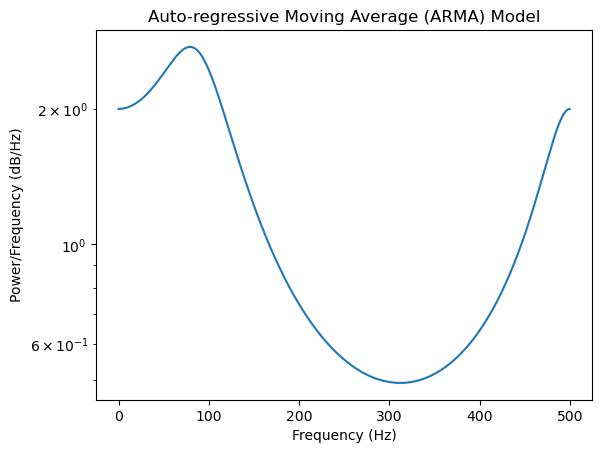

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a sample EEG signal
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of EEG data
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))  # Example EEG signal

# Non-parametric method (Welch's method)
frequencies, psd_welch = signal.welch(eeg_signal, fs, nperseg=256)
plt.figure()
plt.semilogy(frequencies, psd_welch)
plt.title('Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Moving Average (MA) model
order_ma = 10  # Order of the Moving Average model
ma_model = np.ones(order_ma) / order_ma
frequencies, psd_ma = signal.freqz(ma_model, worN=fs, fs=fs)
plt.figure()
plt.semilogy(frequencies, np.abs(psd_ma))
plt.title('Moving Average (MA) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Auto-regression (AR) model
order_ar = 10  # Order of the Auto-regression model
ar_model = np.array([1, -0.5] + [0] * (order_ar - 1))  # Example AR coefficients
frequencies, psd_ar = signal.freqz(1, ar_model, worN=fs, fs=fs)
plt.figure()
plt.semilogy(frequencies, np.abs(psd_ar))
plt.title('Auto-regression (AR) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Auto-regressive Moving Average (ARMA) model
order_arma = (2, 1)  # Order of the ARMA model (AR order, MA order)
arma_model = np.concatenate(([1], -0.5 * np.ones(order_arma[0]), 0.5 * np.ones(order_arma[1])))
frequencies, psd_arma = signal.freqz(1, arma_model, worN=fs, fs=fs)
plt.figure()
plt.semilogy(frequencies, np.abs(psd_arma))
plt.title('Auto-regressive Moving Average (ARMA) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

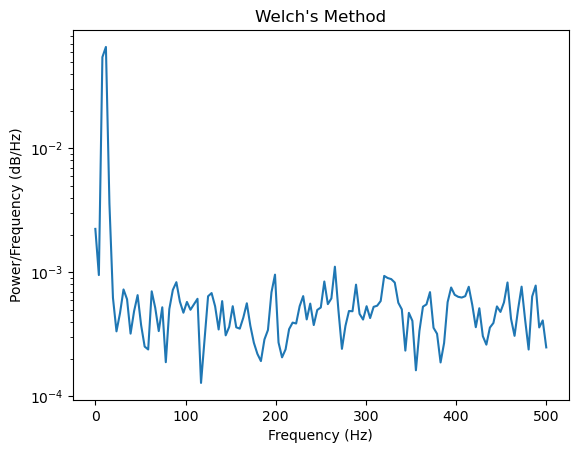

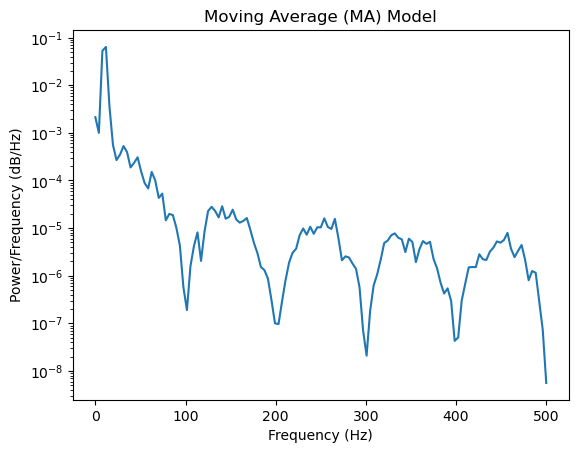

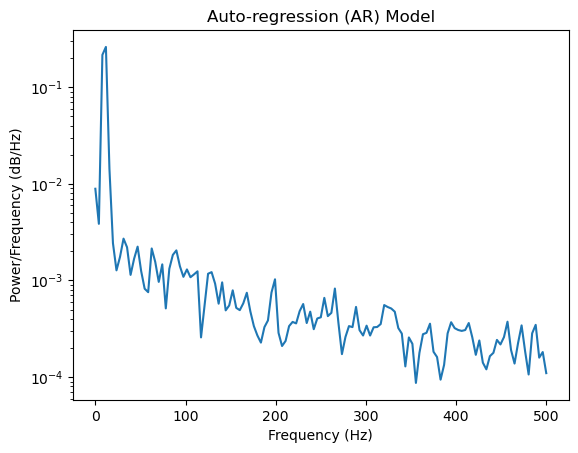

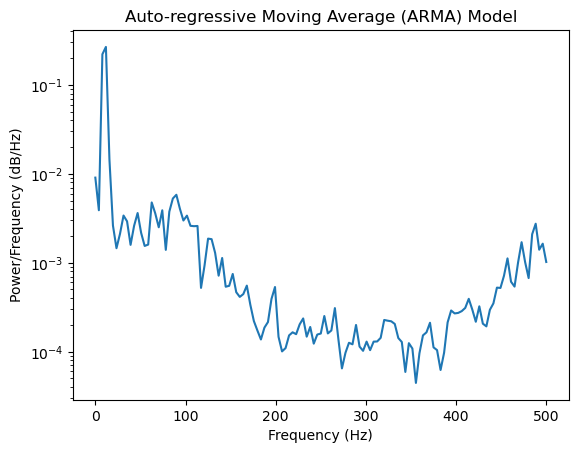

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a sample EEG signal
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of EEG data
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))  # Example EEG signal

# Non-parametric method (Welch's method)
frequencies, psd_welch = signal.welch(eeg_signal, fs, nperseg=256)
plt.figure()
plt.semilogy(frequencies, psd_welch)
plt.title('Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Moving Average (MA) model
order_ma = 10  # Order of the Moving Average model
ma_model = np.ones(order_ma) / order_ma
eeg_ma = signal.lfilter(ma_model, 1, eeg_signal)
frequencies, psd_ma = signal.welch(eeg_ma, fs, nperseg=256)
plt.figure()
plt.semilogy(frequencies, psd_ma)
plt.title('Moving Average (MA) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Auto-regression (AR) model
order_ar = 10  # Order of the Auto-regression model
ar_model = np.array([1, -0.5] + [0] * (order_ar - 1))  # Example AR coefficients
eeg_ar = signal.lfilter([1], ar_model, eeg_signal)
frequencies, psd_ar = signal.welch(eeg_ar, fs, nperseg=256)
plt.figure()
plt.semilogy(frequencies, psd_ar)
plt.title('Auto-regression (AR) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

# Parametric method - Auto-regressive Moving Average (ARMA) model
order_arma = (2, 1)  # Order of the ARMA model (AR order, MA order)
arma_model = np.concatenate(([1], -0.5 * np.ones(order_arma[0]), 0.5 * np.ones(order_arma[1])))
eeg_arma = signal.lfilter([1], arma_model, eeg_signal)
frequencies, psd_arma = signal.welch(eeg_arma, fs, nperseg=256)
plt.figure()
plt.semilogy(frequencies, psd_arma)
plt.title('Auto-regressive Moving Average (ARMA) Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()